In [1]:
import numpy as np
import os
import random
import pickle
import scipy.io as scio

import matplotlib.pyplot as plt
import datetime
import Dataset

In [2]:
with open("../0 save inner data/dataset_all.pkl",'rb') as f:
    dataset = pickle.load(f)

In [3]:
variables = list(dataset[list(dataset)[0]].pigments)
print(variables)
x1, x2, y1, y2p, y2d, y2cal, source = [], [], [], [], [], [], []

['fuco', 'perid', 'hex_fuco', 'but_fuco', 'allo', 'tchl_b', 'zea', 'tchl_a', 'dv_chl_a']


In [4]:
savemat = {"lon":[], "lat":[], "depth":[], "tchla":[], "source":[], "date":[]}

In [5]:
for ds in dataset:
    if any(list(dataset[ds].data_use.values())):
#         satellite_SSTday = dataset[ds].satellite_match["SSTday"]
#         satellite_SSTnight = dataset[ds].satellite_match["SSTnight"]
        satellite_tem = dataset[ds].satellite_match["tem"]
        satellite_sal = dataset[ds].satellite_match["sal"]
        satellite_uo = dataset[ds].satellite_match["uo"]
        satellite_vo = dataset[ds].satellite_match["vo"]
        satellite_ssh = dataset[ds].satellite_match["ssh"]
        satellite_mld = dataset[ds].satellite_match["mld"]
        
        satellite_Rrs412 = dataset[ds].satellite_match["Rrs412"]
        satellite_Rrs443 = dataset[ds].satellite_match["Rrs443"]
        satellite_Rrs490 = dataset[ds].satellite_match["Rrs490"]
        satellite_Rrs510 = dataset[ds].satellite_match["Rrs510"]
        satellite_Rrs560 = dataset[ds].satellite_match["Rrs560"]
        satellite_Rrs665 = dataset[ds].satellite_match["Rrs665"]
        satellite_chla = dataset[ds].satellite_match["chla"]
        satellite_Zeu = dataset[ds].satellite_match["Zeu"]
        
#         satellite_sla = dataset[ds].satellite_match["sla"]
#         satellite_ugos = dataset[ds].satellite_match["ugos"]
#         satellite_vgos = dataset[ds].satellite_match["vgos"]

        # spatial and temporal variables
        year = dataset[ds].datetime.year
        month = dataset[ds].datetime.month
        day = dataset[ds].datetime.day
        lon = dataset[ds].lon
        lat = dataset[ds].lat
        depth = dataset[ds].depth
        
        # pigment
        pigments = [(dataset[ds].pigments[var] if dataset[ds].pigments_use[var] else np.nan) for var in dataset[ds].pigments]
        satellite_mld[satellite_mld>700] = np.nan
        x1.append([satellite_tem,
                   satellite_sal,
                   satellite_uo,
                   satellite_vo,
                   satellite_ssh,
                   satellite_mld,
                   np.log10(satellite_Rrs412+10**-6),
                   np.log10(satellite_Rrs443+10**-6),
                   np.log10(satellite_Rrs490+10**-6),
                   np.log10(satellite_Rrs510+10**-6),
                   np.log10(satellite_Rrs560+10**-6),
                   np.log10(satellite_Rrs665+10**-6),
#                    np.log10(satellite_chla+10**-6),
                   satellite_Zeu,
                  ])
        x2.append([np.sin(month/6*np.pi),np.cos(month/6*np.pi),
                   np.sin(day/31*2*np.pi),np.cos(day/31*2*np.pi),
                   np.sin(lon/180*np.pi),np.cos(lon/180*np.pi),
                   lat/90.,
                   depth/300.,
                  ])
        y1.append(np.log10(pigments))
        y2p.append(pigments)
        y2d.append([depth])
        y2cal.append(1-np.isnan(pigments))
        source.append(dataset[ds].source)
        
        savemat["lon"].append(lon)
        savemat["lat"].append(lat)
        savemat["depth"].append(depth)
        savemat["date"].append(dataset[ds].datetime)
        savemat["tchla"].append(dataset[ds].pigments["tchl_a"] if dataset[ds].pigments_use["tchl_a"] else np.nan)
        

In [6]:
x1,x2 = np.array(x1),np.array(x2)
y1,y2p,y2d,y2cal = np.array(y1),np.array(y2p),np.array(y2d),np.array(y2cal)

y2p[np.isnan(y2p)] = 0
print(x1.shape,x2.shape, y1.shape, y2p.shape,y2d.shape, y2cal.shape)

(33975, 14, 15) (33975, 8) (33975, 9) (33975, 9) (33975, 1) (33975, 9)


In [7]:
with open("../0 save inner data/train datast (1 z_0.5%).pkl",'wb') as f:
    pickle.dump([x1,x2,y1,y2p,y2d,y2cal,source], f)

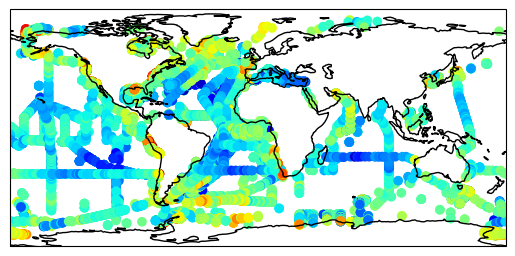

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(savemat["lon"],savemat["lat"],
           transform=ccrs.PlateCarree(),
           c=np.log10(savemat["tchla"]),
           cmap='jet')

Text(0, 0.5, 'count')

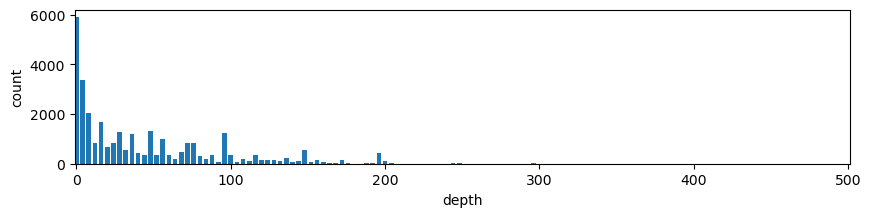

In [9]:
dep = np.array(savemat["depth"])
count = []
for i in np.arange(0,500,4):
    count.append((dep<=i).sum())
count = np.array(count)

plt.figure(figsize=(10,2))
plt.bar(np.arange(0,500,4)[:-1],count[1:]-count[:-1],width=3)
plt.xlim(-1,501)
# plt.ylim(0,1000)
plt.xlabel("depth")
plt.ylabel("count")

Text(0, 0.5, 'count')

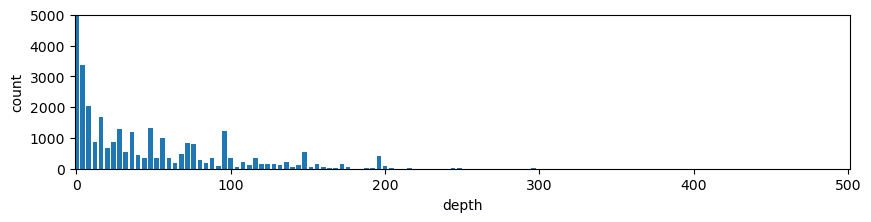

In [10]:
dep = np.array(savemat["depth"])
count = []
for i in np.arange(0,500,4):
    count.append((dep<=i).sum())
count = np.array(count)

plt.figure(figsize=(10,2))
plt.bar(np.arange(0,500,4)[:-1],count[1:]-count[:-1],width=3,)
plt.xlim(-1,501)
plt.ylim(0,5000)
plt.xlabel("depth")
plt.ylabel("count")

In [11]:
sum((dep<=300)&(dep>=200))/len(dep), \
sum((dep<=200)&(dep>=100))/len(dep), \
sum((dep<=100)&(dep>=50))/len(dep), \
sum((dep<=300)&(dep>=200)), \
sum((dep<=200)&(dep>=100)), \
sum((dep<=100)&(dep>=50))

(0.015688005886681382,
 0.13280353200883002,
 0.21501103752759382,
 533,
 4512,
 7305)

In [12]:
# import scipy.io as scio
# savemat["source"] = [True if (s==["Kramer sorted"])
#                      else False for s in source]
# scio.savemat("../0 save data/train_dataset.mat",savemat)

In [13]:
# with open("../0 save inner data/save_data.pkl",'wb') as f:
#     pickle.dump(savemat, f)

In [14]:
# a = []
# for i in range(len(savemat["date"])):
#     a.append("{:04d}-{:02d}-{:02d} {:.2f} {:.2f} {:.1f} {:.4f}".format(savemat["date"][i].year,
#                                                                   savemat["date"][i].month,
#                                                                   savemat["date"][i].day,
#                                                                   savemat["lon"][i],
#                                                                   savemat["lat"][i],
#                                                                   savemat["depth"][i],
#                                                                   savemat["tchla"][i]))
# with open("tchla.txt",'w') as f:
#     f.write("date lon lat depth tchla\n")
#     f.write("\n".join(a))

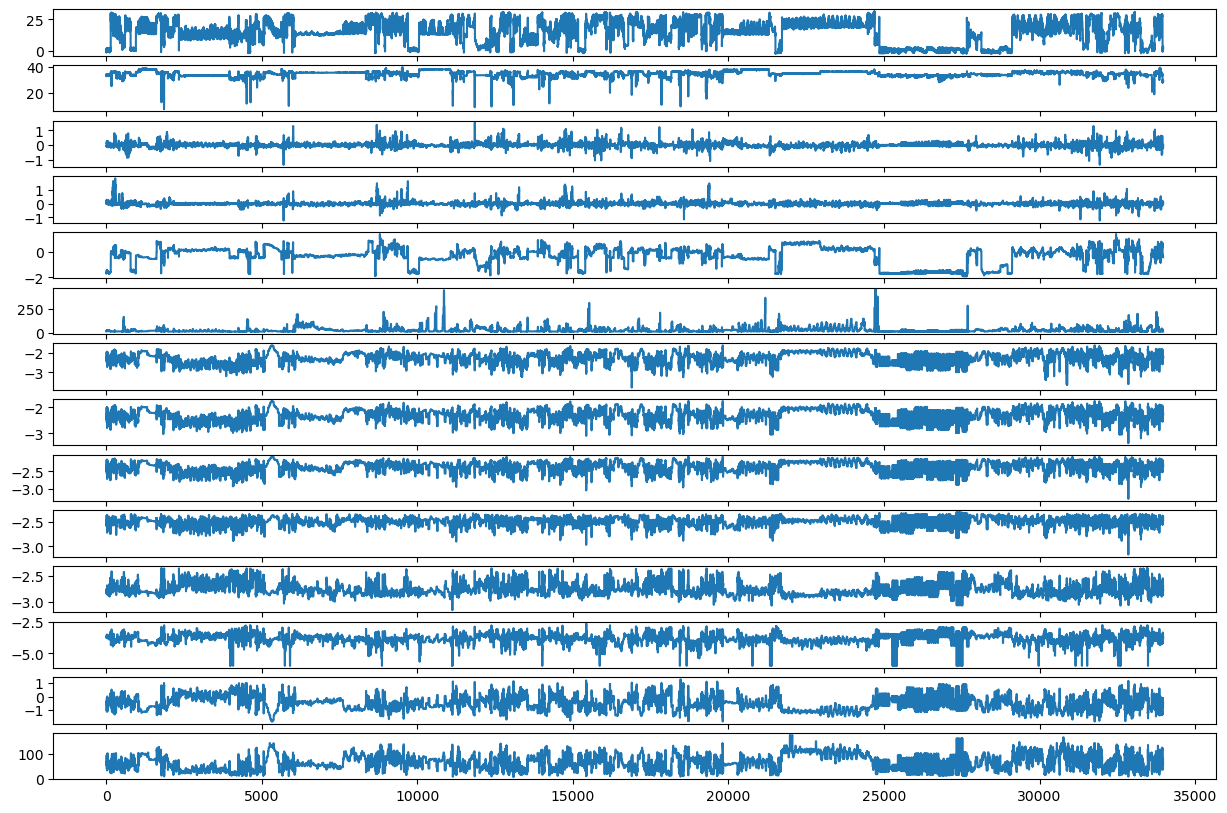

In [15]:
fig,axs = plt.subplots(x1.shape[1],1,figsize=(15,10))
for i in range(x1.shape[1]):
    
    axs[i].plot(np.nanmean(x1[:,i,:],axis=1))